In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [159]:
# Load the CSV file to inspect its contents
file_path = 'data/curated/rental_eda.csv'
rental_data = pd.read_csv(file_path) # data preprocessed for forecasting

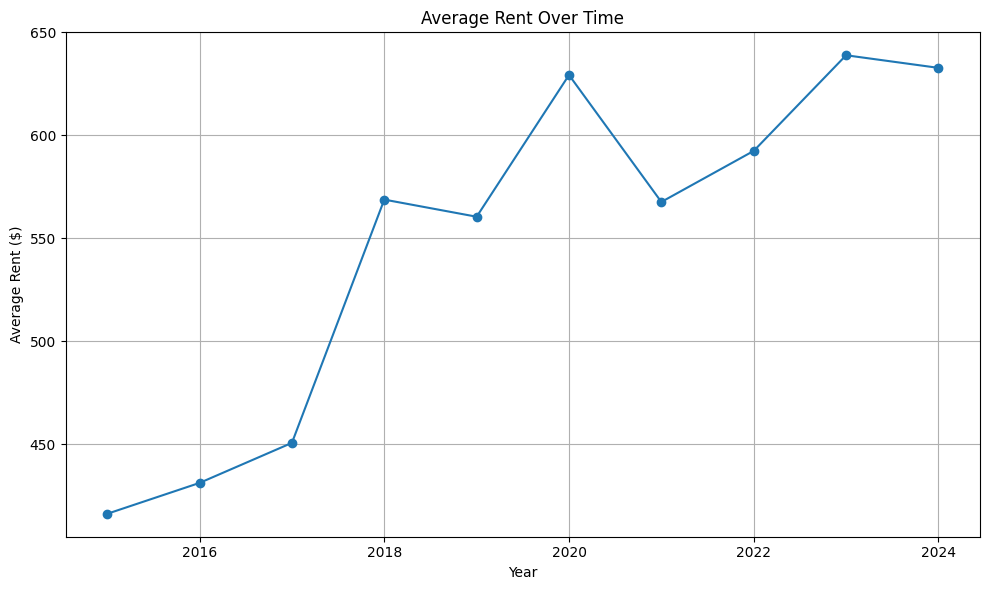

In [160]:
# Group the data by 'Year' and calculate the average rent for each year
rent_over_time = rental_data.groupby('Year')['rent'].mean()

# Plot the trend of rent over time using a line graph
plt.figure(figsize=(10, 6))
plt.plot(rent_over_time.index, rent_over_time.values, marker='o', linestyle='-')
plt.grid(True)
plt.title('Average Rent Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rent ($)')

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_overtime.png')

plt.show()


### Bedrooms & Bathrooms

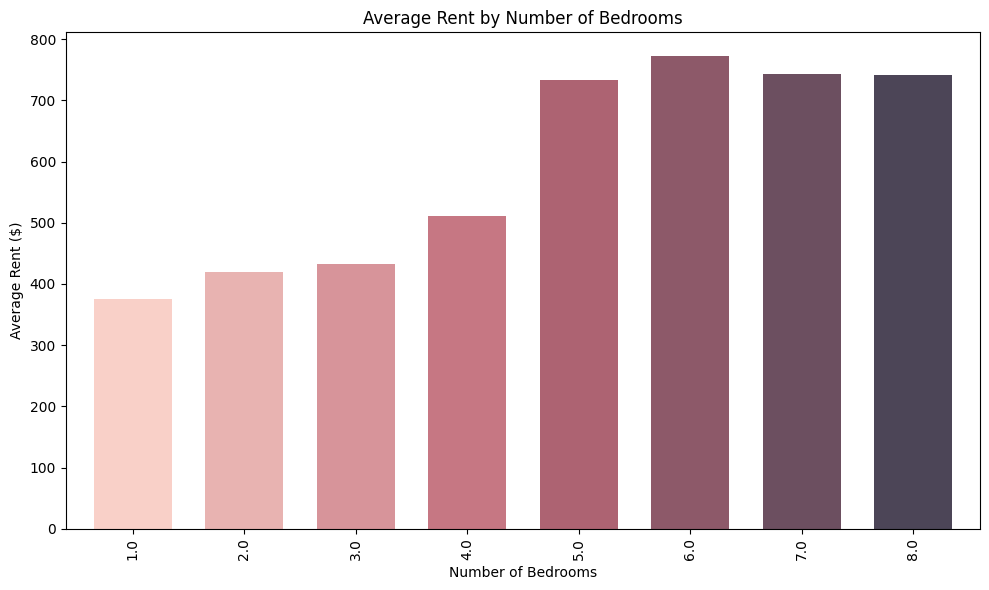

In [161]:
# Avg rent by bedrooms
rent_by_bedrooms = rental_data.groupby('num_bedrooms')['rent'].mean()

custom_colors = ['#f9d0c8', '#bd6877', '#4c4557']
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors)

# Normalize and apply the custom gradient to the bars
color_indices = np.linspace(0, 1, len(rent_by_bedrooms))
bar_colors = custom_cmap(color_indices)

# Create the bar graph with a transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Set the figure background to transparent
ax = plt.gca()  # Get the current axes
ax.patch.set_alpha(0)  # Set axes background to transparent
rent_by_bedrooms.plot(kind='bar', color=bar_colors, width=0.7, ax=ax)
plt.title('Average Rent by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent ($)')
plt.grid(False)

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_bedrooms.png')
plt.show()

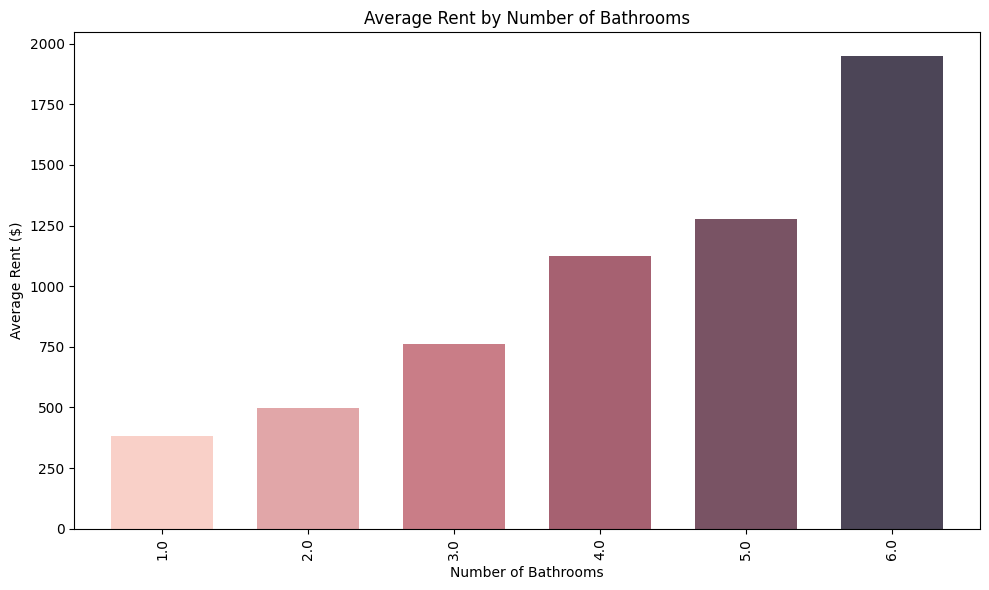

In [162]:
# Group the data by number of bathrooms and calculate the average rent for each group
rent_by_bathrooms = rental_data.groupby('num_bathrooms')['rent'].mean().sort_values()

#custom_colors = ['#f9d0c8', '#bd6877']
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors)

# Normalize and apply the custom gradient to the bars
color_indices = np.linspace(0, 1, len(rent_by_bathrooms))
bar_colors = custom_cmap(color_indices)

# Create the bar graph with a transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Set the figure background to transparent
ax = plt.gca()  # Get the current axes
ax.patch.set_alpha(0)  # Set axes background to transparent

# Plot the bar graph for bathrooms
rent_by_bathrooms.plot(kind='bar', color=bar_colors, width=0.7, ax=ax)
plt.title('Average Rent by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent ($)')
plt.grid(False)

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_bathrooms.png')
plt.show()

In [163]:
# Load the CSV file to inspect its contents
file_path = 'data/curated/rent_by_prop_type.csv'
grouped_rent_df = pd.read_csv(file_path) # data preprocessed for forecasting

In [164]:
grouped_rent_df

,Unnamed: 0,property_types,suburb,distance_to_cbd,num_bedrooms,year,month,avg_rent,data_count,region
0,0,apartment/unit/flat,abbotsford,2.71,1.0,2017,10,350.0,1,city
1,1,apartment/unit/flat,abbotsford,2.71,1.0,2017,11,400.0,1,city
2,2,apartment/unit/flat,abbotsford,2.71,2.0,2017,10,600.0,1,city
3,3,apartment/unit/flat,abbotsford,2.71,2.0,2017,11,550.0,1,city
4,4,apartment/unit/flat,abbotsford,2.80,2.0,2015,6,500.0,1,city
...,...,...,...,...,...,...,...,...,...,...
421681,421681,villa,yarraville,7.23,2.0,2017,2,330.0,1,greater melbourne
421682,421682,villa,yarraville,7.39,3.0,2017,11,480.0,1,greater melbourne
421683,421683,villa,yarraville,7.56,2.0,2015,11,320.0,1,greater melbourne
421684,421684,villa,yarraville,7.65,2.0,2017,8,440.0,1,greater melbourne


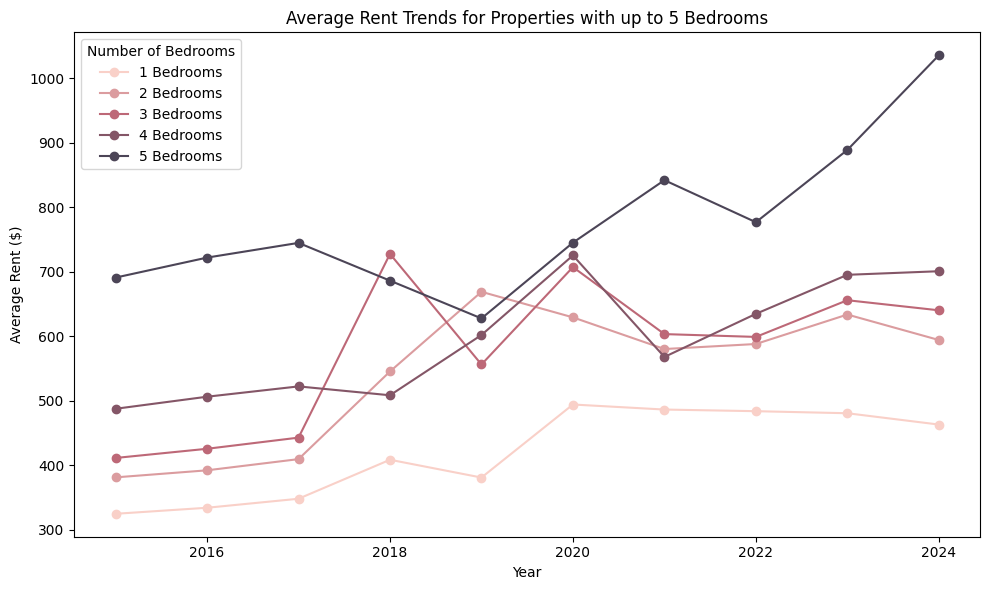

In [165]:
rent_data = grouped_rent_df

# Extend the dataset to include 5 bedrooms and handle missing data by interpolating between points
bedroom_data_up_to_5 = rent_data[rent_data['num_bedrooms'].isin([1, 2, 3, 4, 5])]

# Group by year and number of bedrooms, calculate the mean rent, and fill missing values by interpolation
rent_trends_by_bedrooms_up_to_5 = bedroom_data_up_to_5.groupby(['year', 'num_bedrooms'])['avg_rent'].mean().unstack()

# Interpolate missing data to ensure lines are continuous
rent_trends_by_bedrooms_up_to_5 = rent_trends_by_bedrooms_up_to_5.interpolate()

# Define the custom color gradient
custom_colors = ['#f9d0c8', '#bd6877', '#4c4557']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Plotting rent trends for properties with up to 5 bedrooms with custom gradient colors
plt.figure(figsize=(10, 6))

# Normalize the number of bedrooms to map to the color gradient
bedroom_range = np.linspace(0, 1, len(rent_trends_by_bedrooms_up_to_5.columns))

for i, column in enumerate(rent_trends_by_bedrooms_up_to_5.columns):
    plt.plot(rent_trends_by_bedrooms_up_to_5.index, rent_trends_by_bedrooms_up_to_5[column], 
             marker='o', label=f'{int(column)} Bedrooms', color=cmap(bedroom_range[i]))

plt.title('Average Rent Trends for Properties with up to 5 Bedrooms')
plt.xlabel('Year')
plt.ylabel('Average Rent ($)')
plt.legend(title="Number of Bedrooms")

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_by_bedrooms.png')
plt.show()

### Average Rent by Property Type in the City

/tmp/ipykernel_29158/1727131341.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_trend_by_property_type_city_filtered['studio'] = avg_trend_by_property_type_city_filtered['studio'].interpolate(method='linear')


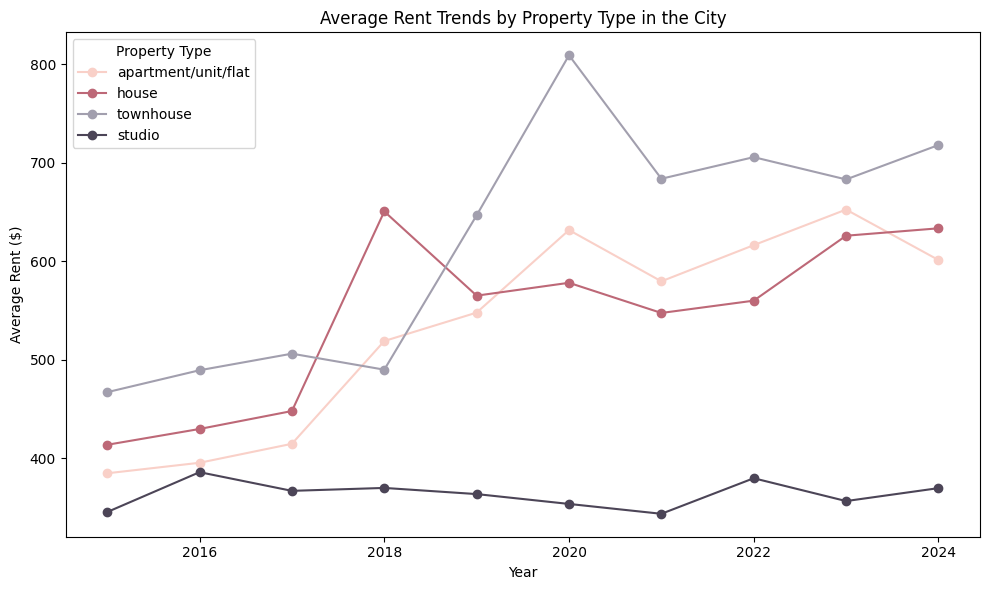

In [166]:
# Filter the property types and ensure only the specified ones are included
property_types_filter = ['apartment/unit/flat', 'house', 'townhouse', 'studio']
colors = ['#f9d0c8', '#bd6877', '#a29fae', '#4c4557']

# Group the data by year and property type, and calculate the mean rent for each group
avg_trend_by_property_type_city = grouped_rent_df.groupby(['year', 'property_types'])['avg_rent'].mean().unstack()

# Filter the dataframe to include only the specified property types
avg_trend_by_property_type_city_filtered = avg_trend_by_property_type_city[property_types_filter]

# Fill missing values in the 'studio' column using linear interpolation
avg_trend_by_property_type_city_filtered['studio'] = avg_trend_by_property_type_city_filtered['studio'].interpolate(method='linear')

# Plotting the average rent trends by property type in the "city" region
plt.figure(figsize=(10, 6))

# Loop through each property type and corresponding color
for i, column in enumerate(avg_trend_by_property_type_city_filtered.columns):
    plt.plot(avg_trend_by_property_type_city_filtered.index, 
             avg_trend_by_property_type_city_filtered[column], 
             marker='o', label=column, color=colors[i])

# Adding labels, title, and grid
plt.title('Average Rent Trends by Property Type in the City')
plt.xlabel('Year')
plt.ylabel('Average Rent ($)')
plt.legend(title="Property Type")

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_by_property_type.png')
plt.show()


### Property Distribution in CBD, Suburbs, Regional VIC

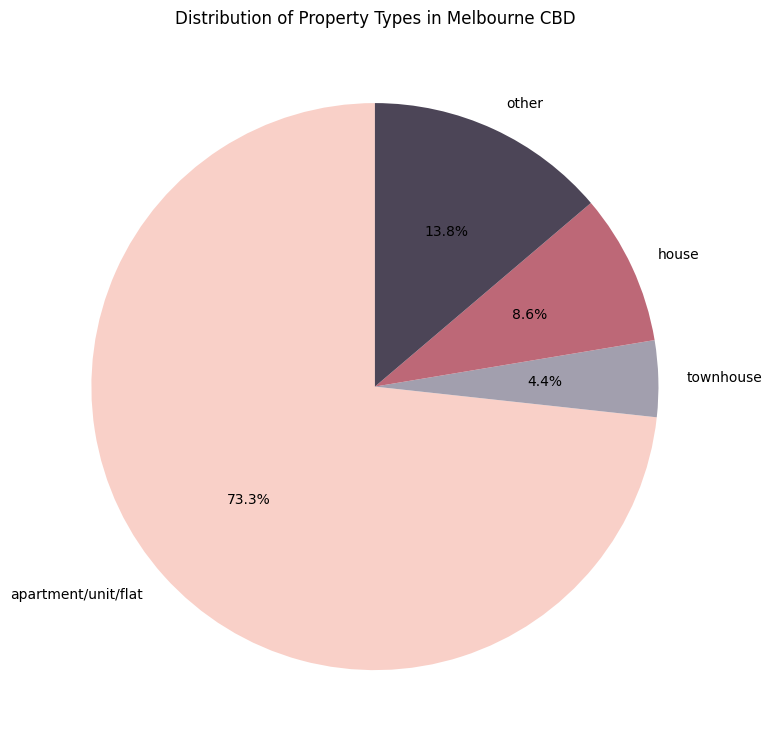

In [167]:
# Filtering for Melbourne
melbourne_data = grouped_rent_df[grouped_rent_df['suburb'].str.contains('melbourne', case=False)]

# Count the number of each property type in Melbourne
property_type_counts = melbourne_data['property_types'].value_counts()

# Group property types smaller than 10% into an "Other" category, keeping "townhouse" and "house" separate
threshold = 0.10 * property_type_counts.sum()
filtered_counts = property_type_counts.copy()

# Ensure "townhouse" and "house" are separated, then group others smaller than 10%
if 'townhouse' in filtered_counts.index:
    townhouse_count = filtered_counts.pop('townhouse')
if 'house' in filtered_counts.index:
    house_count = filtered_counts.pop('house')

filtered_counts = filtered_counts[filtered_counts >= threshold]

# Add the "townhouse" and "house" back to the filtered counts
filtered_counts['townhouse'] = townhouse_count
filtered_counts['house'] = house_count

other_count = property_type_counts[property_type_counts < threshold].sum()
filtered_counts['other'] = other_count

# Plot the updated pie chart with "townhouse" and "house" separated, and other small categories grouped
plt.figure(figsize=(8, 8))
filtered_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#f9d0c8', '#a29fae', '#bd6877', '#4c4557'])
plt.title('Distribution of Property Types in Melbourne CBD')
plt.ylabel('')  # Remove the y-label for better presentation in a pie chart

# save
plt.tight_layout()
plt.savefig('plot/property_distribution_cbd.png')
plt.show()

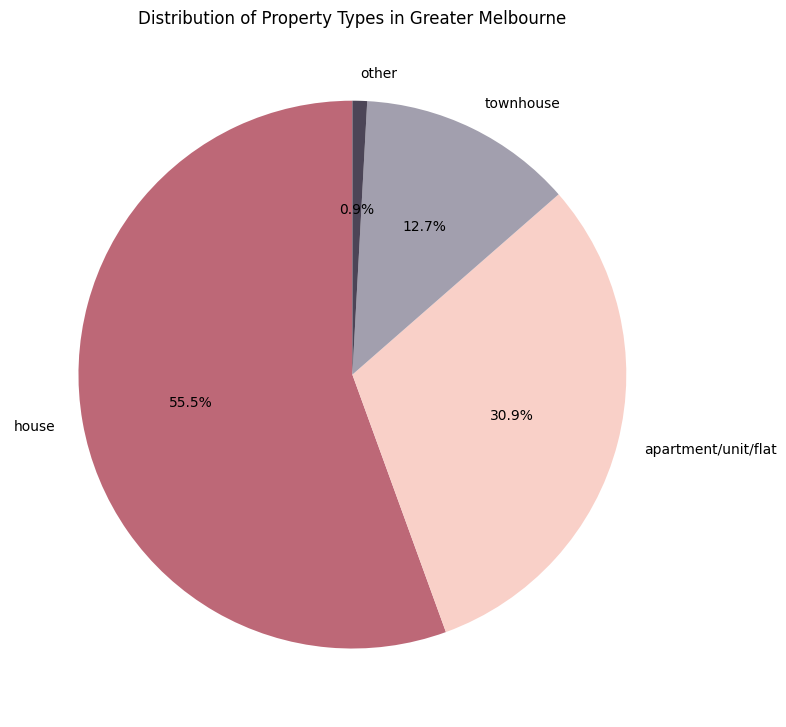

In [168]:
# Filtering for "Greater Melbourne" region
greater_melbourne_data = grouped_rent_df[grouped_rent_df['region'].str.contains('greater melbourne', case=False)]

# Count the number of each property type in Greater Melbourne
property_type_counts_greater_melbourne = greater_melbourne_data['property_types'].value_counts()

# Group property types smaller than 10% into an "Other" category, keeping "townhouse" separate
threshold = 0.10 * property_type_counts_greater_melbourne.sum()
filtered_counts_greater_melbourne = property_type_counts_greater_melbourne.copy()

# Ensure "townhouse" is separated, then group others smaller than 10%
if 'townhouse' in filtered_counts_greater_melbourne.index:
    townhouse_count = filtered_counts_greater_melbourne.pop('townhouse')
    filtered_counts_greater_melbourne = filtered_counts_greater_melbourne[filtered_counts_greater_melbourne >= threshold]
    filtered_counts_greater_melbourne['townhouse'] = townhouse_count
else:
    filtered_counts_greater_melbourne = filtered_counts_greater_melbourne[filtered_counts_greater_melbourne >= threshold]

other_count = property_type_counts_greater_melbourne[property_type_counts_greater_melbourne < threshold].sum()
filtered_counts_greater_melbourne['other'] = other_count

# Plot the updated pie chart with "townhouse" separated and other small categories grouped
plt.figure(figsize=(8, 8))
filtered_counts_greater_melbourne.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#bd6877', '#f9d0c8', '#a29fae', '#4c4557'])
plt.title('Distribution of Property Types in Greater Melbourne')
plt.ylabel('')  # Remove the y-label for better presentation in a pie chart

# save
plt.tight_layout()
plt.savefig('plot/property_distribution_greatmelb.png')
plt.show()

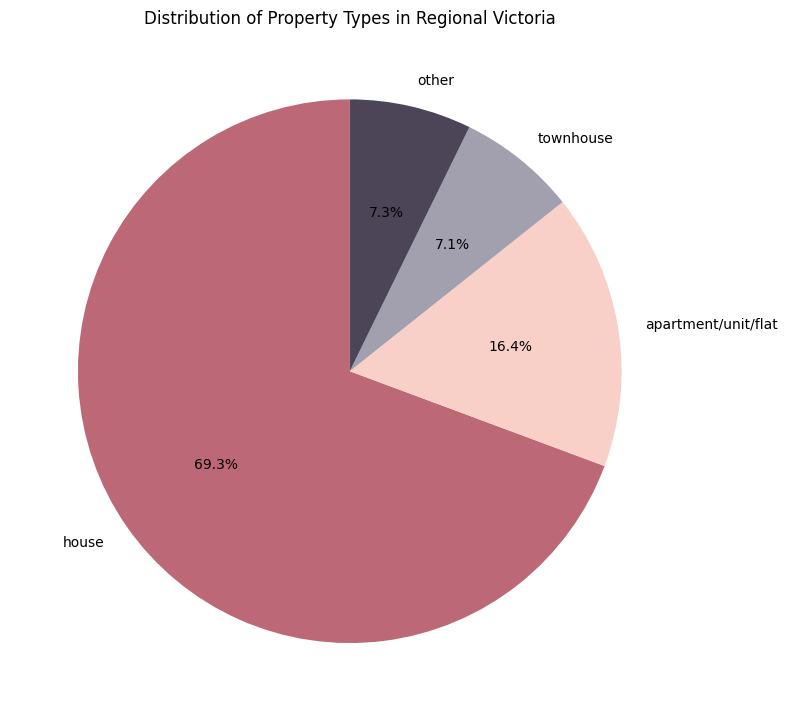

In [169]:
# Filtering for "Greater Melbourne" region
region_data = grouped_rent_df[grouped_rent_df['region'].str.contains('regional vic', case=False)]

# Count the number of each property type in Greater Melbourne
property_type_counts = region_data['property_types'].value_counts()

# Group property types smaller than 10% into an "Other" category, keeping "townhouse" separate
threshold = 0.10 * property_type_counts.sum()
filtered_counts = property_type_counts.copy()

# Ensure "townhouse" is separated, then group others smaller than 10%
if 'townhouse' in filtered_counts.index:
    townhouse_count = filtered_counts.pop('townhouse')
    filtered_counts = filtered_counts[filtered_counts >= threshold]
    filtered_counts['townhouse'] = townhouse_count
else:
    filtered_counts = filtered_counts[filtered_counts >= threshold]

other_count = property_type_counts[property_type_counts < threshold].sum()
filtered_counts['other'] = other_count

# Plot the updated pie chart with "townhouse" separated and other small categories grouped
plt.figure(figsize=(8, 8))
filtered_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#bd6877', '#f9d0c8', '#a29fae', '#4c4557'])
plt.title('Distribution of Property Types in Regional Victoria')
plt.ylabel('')  # Remove the y-label for better presentation in a pie chart

# save
plt.tight_layout()
plt.savefig('plot/property_distribution_regionalvic.png')
plt.show()

### Average Rent Price by Month

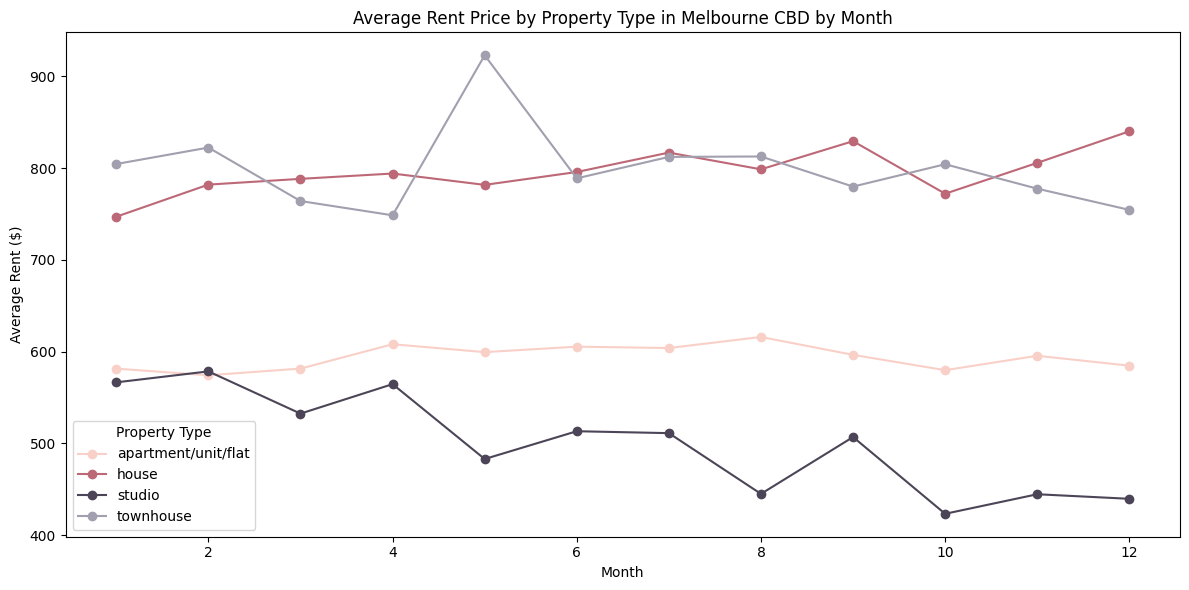

In [170]:
# Filter Melbourne suburbs containing 'melbourne'
melbourne_data = grouped_rent_df[grouped_rent_df['suburb'].str.contains('melbourne', case=False)]

# Filter the data for specific property types: apartment, house, townhouse, studio
property_types_filter = ['apartment/unit/flat', 'house', 'townhouse', 'studio'] # 'serviced apartmentnot enough data
filtered_property_data = melbourne_data[melbourne_data['property_types'].isin(property_types_filter)]

# Group by property type and month, and calculate the average rent
avg_rent_by_property_and_month = filtered_property_data.groupby(['month', 'property_types'])['avg_rent'].mean().unstack()

# Plotting the overall average rent trends by month for each property type
plt.figure(figsize=(12, 6))

# Define a color palette
colors = ['#f9d0c8', '#bd6877', '#4c4557', '#a29fae']

# Loop through property types and plot with assigned colors
for i, property_type in enumerate(avg_rent_by_property_and_month.columns):
    plt.plot(avg_rent_by_property_and_month.index, avg_rent_by_property_and_month[property_type], marker='o', label=property_type, color=colors[i])

plt.title('Average Rent Price by Property Type in Melbourne CBD by Month')
plt.xlabel('Month')
plt.ylabel('Average Rent ($)')
plt.legend(title="Property Type")

# save
plt.tight_layout()
plt.savefig('plot/avg_rent_by_month_cbd.png')
plt.show()


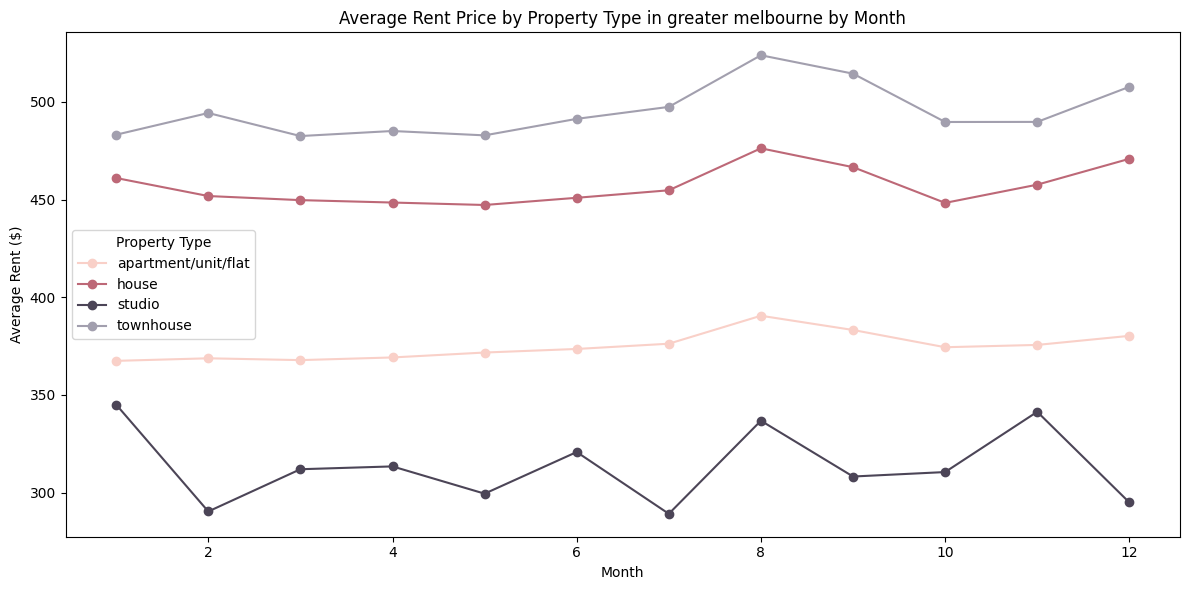

In [171]:
# Filter the data for region 'Greater Melbourne' and specific property types (generalized for reuse)
def plot_avg_rent_trends(region_name, property_types, data, by='month'):
    # Filter by region
    region_data = data[data['region'].str.contains(region_name, case=False)]
    
    # Filter by property types
    filtered_data = region_data[region_data['property_types'].isin(property_types)]
    
    # Group by property type and the specified column (month/year), then calculate average rent
    avg_rent = filtered_data.groupby([by, 'property_types'])['avg_rent'].mean().unstack()

    # Plotting the average rent trends for each property type
    plt.figure(figsize=(12, 6))

    # Define a color palette
    colors = ['#f9d0c8', '#bd6877', '#4c4557', '#a29fae']

    # Loop through property types and plot with assigned colors
    for i, property_type in enumerate(avg_rent.columns):
        plt.plot(avg_rent.index, avg_rent[property_type], marker='o', label=property_type, color=colors[i])

    plt.title(f'Average Rent Price by Property Type in {region_name} by {by.capitalize()}')
    plt.xlabel(by.capitalize())
    plt.ylabel('Average Rent ($)')
    plt.legend(title="Property Type")

    # save
    plt.tight_layout()
    plt.savefig('plot/avg_rent_by_month_'+region_name+'.png')
    plt.show()

# Calling the function for 'Greater Melbourne' and plotting by 'month'
property_types_filter = ['apartment/unit/flat', 'house', 'townhouse', 'studio']
plot_avg_rent_trends('greater melbourne', property_types_filter, grouped_rent_df, by='month')



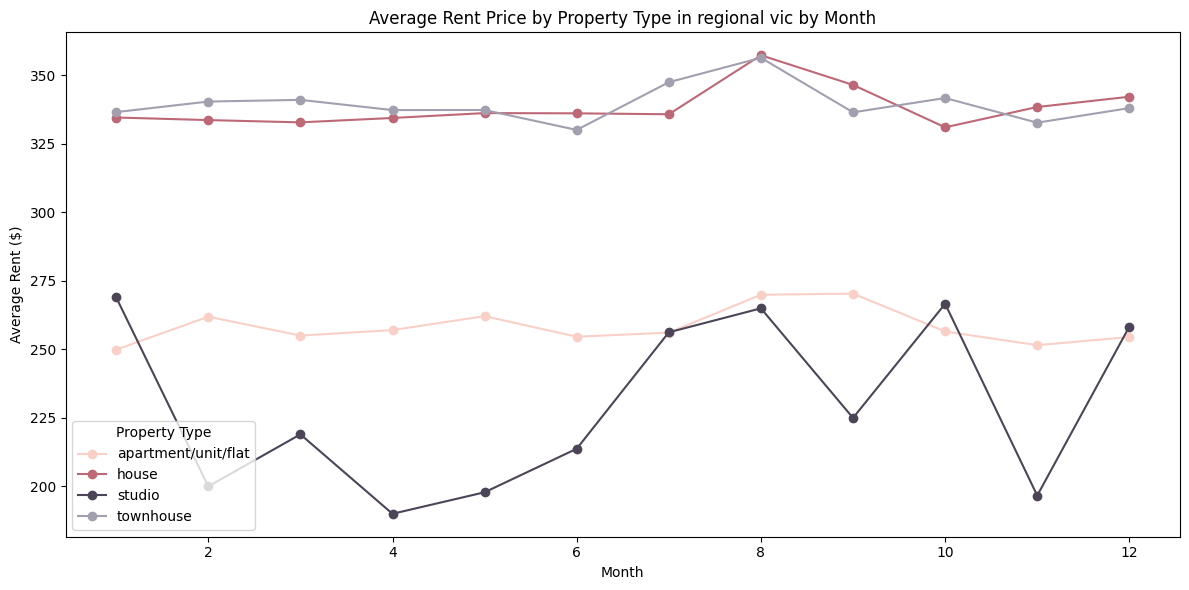

In [172]:
plot_avg_rent_trends('regional vic', property_types_filter, grouped_rent_df, by='month')
